## Introduction

This project implements a simple movie recommendation system using the MovieLens dataset. The workflow begins with loading data on movies, ratings, tags, and external links. Features and target variables are extracted, and the dataset is split into training and test sets. Multiple regression models (Linear Regression, Decision Tree, KNN) are trained and evaluated using metrics such as RMSE and R². The best-performing model is then used to predict ratings for movies unseen by the user. Based on these predictions, a list of recommended movies is generated, including their genres, user-provided tags, and external identifiers (IMDb/TMDb). To enhance analysis, the final recommendation table is displayed, and visualizations such as a heatmap (to highlight missing values) and a barplot (to show the number of user tags per movie) are created. This approach not only provides personalized recommendations but also offers insights into data quality and user engagement with movies.

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.metrics as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Dataset

In [2]:
# Read dataset
links= pd.read_csv ("ml-latest/links.csv")
movies= pd.read_csv ("ml-latest/movies.csv")
ratings= pd.read_csv ("ml-latest/ratings.csv")
tags= pd.read_csv ("ml-latest/tags.csv")

# Print shape
print("links:" , links.shape)
print("movies:" , movies.shape)
print("ratings:" , ratings.shape)
print("tags:" , tags.shape)

# Get head
print(links.head())
print(movies.head())
print(ratings.head())
print(tags.head())

links: (86537, 3)
movies: (86537, 3)
ratings: (33832162, 4)
tags: (2328315, 4)
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating   timestamp
0       1        1     4.0  1225734739
1       1      110     4.0  1225865086
2       1      158     4.0  1225733503
3 

## Extracting features and target from ratings dataset

In [ ]:
x=ratings[["userId","movieId"]] # Select userId and movieId columns as features (X)
y=ratings["rating"] # Select rating column as target (y)

print("x shape:",x.shape) # Print the shape of X (rows, columns)
print("y shape:",y.shape) # Print the shape of y (rows,)

print("x head:",x.head()) # Display the first few rows of X
print("y head:",y.head()) # Display the first few rows of y

x shape: (33832162, 2)
y shape: (33832162,)
x head:    userId  movieId
0       1        1
1       1      110
2       1      158
3       1      260
4       1      356
y head: 0    4.0
1    4.0
2    4.0
3    4.5
4    5.0
Name: rating, dtype: float64


## Splitting dataset into training and test sets

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33000) # Split the dataset into training and test sets (80% train, 20% test)

print("x shape:",x.shape) # Print the shape of X (rows, columns)
print("y shape:",y.shape) # Print the shape of y (rows,)

x shape: (33832162, 2)
y shape: (33832162,)


## Training and evaluating multiple regression models

In [ ]:
# Define a list of regression models to test
RobotTest = [
    LinearRegression(),
    DecisionTreeRegressor(),
    KNeighborsRegressor()
]

for model in RobotTest: # Iterate through each model in the list
    model.fit(X_train, y_train) # Fit the model on the training data
    print(f"{model}:") # Print the model name
    print("Training RMSE:", np.sqrt(sm.mean_squared_error(y_train, model.predict(X_train)))) # Calculate and print RMSE on training data
    print("Testing RMSE:", np.sqrt(sm.mean_squared_error(y_test, model.predict(X_test)))) # Calculate and print RMSE on testing data
    print() # Print a blank line for readability

LinearRegression():
Training RMSE: 1.063850724096353
Testing RMSE: 1.0643287860075556

DecisionTreeRegressor():
Training RMSE: 0.0
Testing RMSE: 1.3610137259510604

KNeighborsRegressor():
Training RMSE: 0.8849323008176009
Testing RMSE: 1.089786795307882



## Training best model and making predictions  

In [ ]:
Robot=LinearRegression() # Initialize a Linear Regression model
Robot.max_iter=1000000 # Set maximum number of iterations to 1,000,000
Robot.fit(X_train,y_train) # Fit the model using training data (X_train, y_train)

Robot.predict(X_test) # Predict target values for test data (X_test)

array([3.54258636, 3.54148827, 3.53988838, ..., 3.54286253, 3.54163083,
       3.54273047])

In [ ]:
y_test # Show the target values from the test set

27833954    4.0
10314855    3.0
22103633    2.0
5681752     1.0
19552347    4.0
           ... 
14324397    4.0
5889987     4.0
20025424    0.5
19471188    0.5
22804886    4.0
Name: rating, Length: 6766433, dtype: float64

In [ ]:
Robot.score(X_test,y_test) # Evaluating model performance with R² score

2.3326648634358627e-05

## Generating personalized movie recommendations for a user

In [ ]:
user_id = 1 # Define the target user ID

seen_movies = ratings[ratings["userId"] == user_id]["movieId"].unique() # Get movies already seen by the user

all_movies = movies["movieId"].unique() # Get all available movies
unseen_movies = np.setdiff1d(all_movies, seen_movies) # Find movies not yet seen by the user

user_movies = pd.DataFrame({"userId": user_id, "movieId": unseen_movies}) # Create a DataFrame of unseen movies for the user
pred_scores = Robot.predict(user_movies) # Predict scores for unseen movies using the trained model

top_indices = np.argsort(-pred_scores)[:10] # Get indices of top 10 highest predicted scores
recommended_ids = unseen_movies[top_indices] # Get IDs of recommended movies

recommended_movies = movies[movies["movieId"].isin(recommended_ids)] # Retrieve movie details for recommended IDs
# Print top recommendations for the user
print("\nTop recommendations for user", user_id)
print(recommended_movies[["movieId", "title", "genres"]])

# Retrieve user tags for recommended movies
movie_tags = tags[tags["movieId"].isin(recommended_ids)]
print("\nUser tags for recommended movies:")
print(movie_tags.groupby("movieId")["tag"].apply(list))

# Retrieve external links (IMDb/TMDb IDs) for recommended movies
movie_links = links[links["movieId"].isin(recommended_ids)]
print("\nExternal links (IMDb/TMDb IDs):")
print(movie_links)


Top recommendations for user 1
    movieId                               title                      genres
1         2                      Jumanji (1995)  Adventure|Children|Fantasy
2         3             Grumpier Old Men (1995)              Comedy|Romance
3         4            Waiting to Exhale (1995)        Comedy|Drama|Romance
4         5  Father of the Bride Part II (1995)                      Comedy
5         6                         Heat (1995)       Action|Crime|Thriller
6         7                      Sabrina (1995)              Comedy|Romance
7         8                 Tom and Huck (1995)          Adventure|Children
8         9                 Sudden Death (1995)                      Action
9        10                    GoldenEye (1995)   Action|Adventure|Thriller
10       11      American President, The (1995)        Comedy|Drama|Romance

User tags for recommended movies:
movieId
2     [animals, based on a book, fantasy, magic boar...
3     [sequel, moldy, old, old ag

## Building final recommendation table and visualizing missing data  

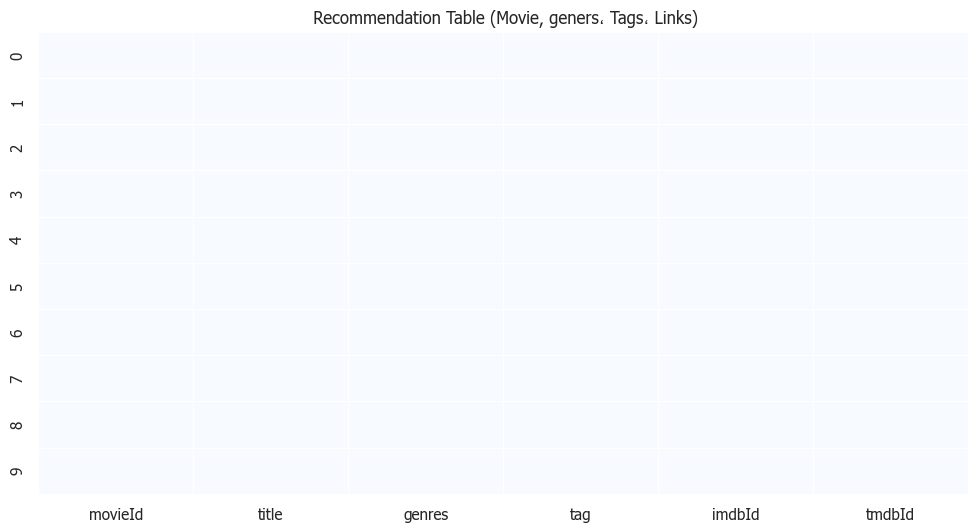

   movieId                               title                      genres  \
0        2                      Jumanji (1995)  Adventure|Children|Fantasy   
1        3             Grumpier Old Men (1995)              Comedy|Romance   
2        4            Waiting to Exhale (1995)        Comedy|Drama|Romance   
3        5  Father of the Bride Part II (1995)                      Comedy   
4        6                         Heat (1995)       Action|Crime|Thriller   
5        7                      Sabrina (1995)              Comedy|Romance   
6        8                 Tom and Huck (1995)          Adventure|Children   
7        9                 Sudden Death (1995)                      Action   
8       10                    GoldenEye (1995)   Action|Adventure|Thriller   
9       11      American President, The (1995)        Comedy|Drama|Romance   

                                                 tag  imdbId   tmdbId  
0  [animals, based on a book, fantasy, magic boar...  113497   8844.0

In [ ]:
recommended_movies = movies[movies["movieId"].isin(recommended_ids)] # Select recommended movies based on IDs
movie_tags = tags[tags["movieId"].isin(recommended_ids)].groupby("movieId")["tag"].apply(list).reset_index() # Get user tags for recommended movies and group them by movieId
movie_links = links[links["movieId"].isin(recommended_ids)] # Get external links (IMDb/TMDb IDs) for recommended movies

merged = recommended_movies.merge(movie_tags, on="movieId", how="left") # Merge recommended movies with tags
merged = merged.merge(movie_links, on="movieId", how="left") # Merge the result with external links

final_table = merged[["movieId", "title", "genres", "tag", "imdbId", "tmdbId"]] # Create the final recommendation table with selected columns

# Plot a heatmap to visualize missing values in the final table
plt.figure(figsize=(12,6))
sb.set(font="Tahoma")
sb.heatmap(pd.DataFrame(final_table.isnull().astype(int)),
            cbar=False, cmap="Blues", linewidths=0.5)

# Set the title of the heatmap
plt.title(" Recommendation Table (Movie, geners، Tags، Links)")
plt.show()

# Print the final recommendation table
print(final_table)

## Visualizing number of user tags for recommended movies

C:\Users\PcKala.org\AppData\Local\Temp\ipykernel_12256\4148595621.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


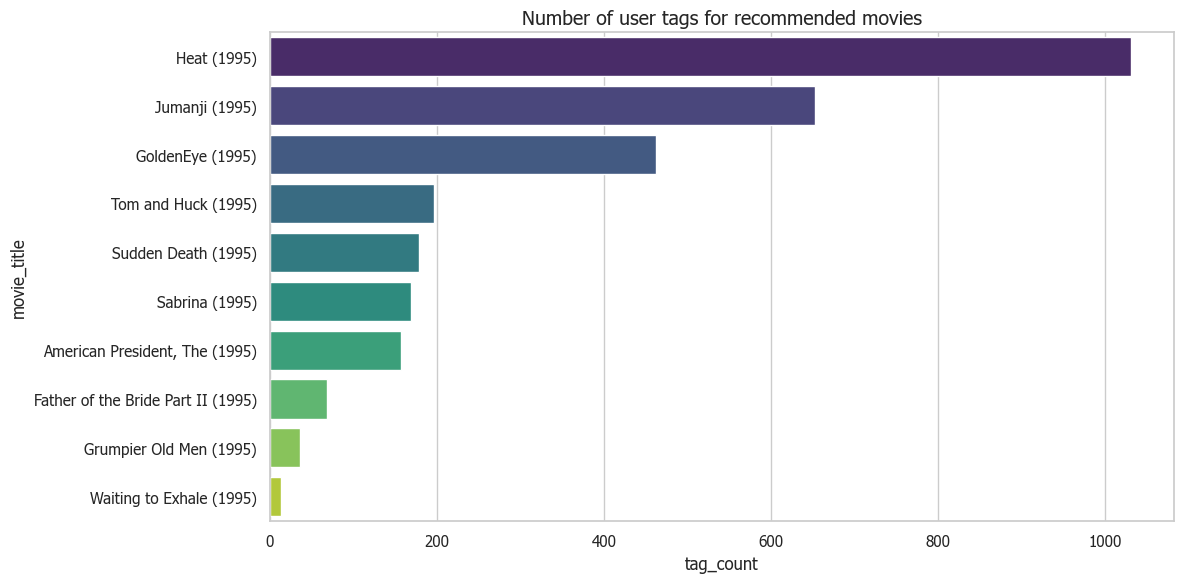

In [ ]:
final_table["tag_count"] = final_table["tag"].apply(lambda x: len(x) if isinstance(x, list) else 0) # Add a new column 'tag_count' that stores the number of tags for each movie

sb.set(style="whitegrid", font="Tahoma") # Set seaborn style and font
plt.figure(figsize=(12,6)) # Create a figure with specific size

# Plot a bar chart showing tag_count vs movie title
sb.barplot(
    x = "tag_count",
    y = "title",
    data = final_table.sort_values ("tag_count", ascending=False),
    palette="viridis"
)

plt.title ("Number of user tags for recommended movies" , fontsize=14) # Set chart title
plt.xlabel ("tag_count") # Set x-axis label
plt.ylabel ("movie_title") # Set y-axis label
plt.tight_layout () # Adjust layout for better readability
plt.show () # Show the plot

## Merging recommendation data and visualizing user tag counts

C:\Users\PcKala.org\AppData\Local\Temp\ipykernel_12256\2340624980.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot (


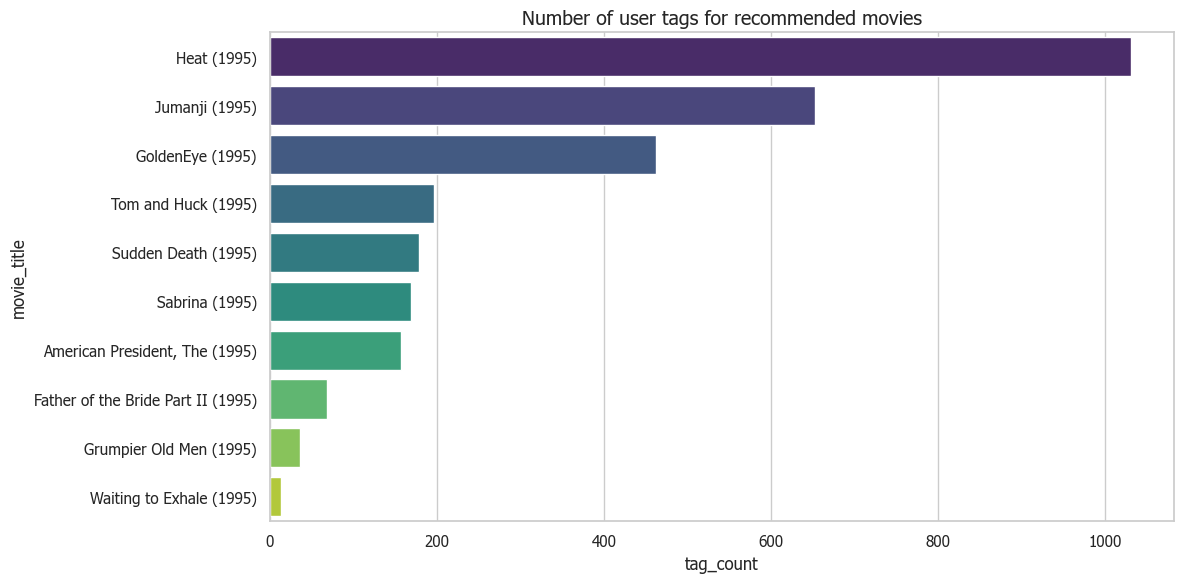

In [ ]:
# Merge recommended movies with user tags (grouped by movieId)
final_table = recommended_movies.merge (
    tags[tags["movieId"].isin(recommended_ids)].groupby("movieId")["tag"].apply(list).reset_index() ,
    on = "movieId" ,
    how = "left" ,
).merge(
    links[links["movieId"].isin(recommended_ids)] ,
    on = "movieId" ,
    how = "left"
)

# Add a column 'tag_count' to store number of tags per movie
final_table["tag_count"] = final_table["tag"].apply(lambda x: len(x) if isinstance(x, list) else 0)

sb.set(style="whitegrid", font="Tahoma") # Set seaborn style and font
plt.figure(figsize=(12,6)) # Create a figure with specific size

# Plot a bar chart showing tag_count vs movie title
sb.barplot (
    x = "tag_count" ,
    y = "title" ,
    data = final_table.sort_values("tag_count" , ascending=False) , 
    palette = "viridis"
)

plt.title ("Number of user tags for recommended movies" , fontsize=14) # Set chart title
plt.xlabel ("tag_count") # Set x-axis label
plt.ylabel ("movie_title") # Set y-axis label
plt.tight_layout () # Adjust layout for better readability
plt.show () # Show the plot

## Conclusion

This project successfully implemented a simple yet practical movie recommendation system using the MovieLens dataset. The workflow included loading and exploring the data, extracting features and target variables, training multiple regression models, and evaluating them with metrics such as RMSE and R². The best-performing model was then applied to predict ratings for unseen movies, generating personalized recommendations for the user. The final recommendation table was enriched with genres, user tags, and external links, and visualized through heatmaps and barplots to highlight data quality and user engagement. The project demonstrates that even with basic models and open datasets, it is possible to build a personalized recommender system and present it in a professional manner. This makes it a strong portfolio piece for showcasing applied machine learning skills.